<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Machine_Learning_%EB%A6%BF%EC%A7%80(Ridge)%2C%EB%9D%BC%EC%8F%98(Lasso)%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from elice_utils import EliceUtils
elice_utils = EliceUtils()

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.datasets import load_boston

"""
1. 사이킷런에 존재하는 데이터를 불러오고,
   불러온 데이터를 학습용 데이터와 테스트용 데이터로
   분리하여 반환하는 함수를 구현합니다.

   Step01. 사이킷런에 존재하는 boston 데이터를
           (X, y)의 형태로 불러옵니다.

   Step02. 데이터의 변수 이름을 feature_names 에
           저장합니다.
"""
def load_data():

    X, y = load_boston(return_X_y = True)

    feature_names = load_boston().feature_names

    return X,y,feature_names

"""
2. 릿지(Ridge) 회귀를 구현하고,
   전체 데이터를 바탕으로 학습시킨 모델을
   반환하는 함수를 완성합니다.

   Step01. 사이킷런에 구현되어 있는
           릿지(Ridge) 회귀 모델을 불러옵니다.

           파라미터 alpha를 10으로 설정합니다.

   Step02. 불러온 모델을 전체 데이터에 맞춰
           학습시킵니다.
"""
def Ridge_regression(X, y):

    ridge_reg = Ridge(alpha=10)

    ridge_reg.fit(X, y)

    return ridge_reg

"""
3. 라쏘(Lasso) 회귀를 구현하고,
   전체 데이터를 바탕으로 학습시킨 모델을
   반환하는 함수를 완성합니다.

   Step01. 사이킷런에 구현되어 있는
           라쏘(Lasso) 회귀 모델을 불러옵니다.

           파라미터 alpha를 10으로 설정합니다.

   Step02. 불러온 모델을 전체 데이터에 맞춰
           학습시킵니다.
"""
def Lasso_regression(X, y):

    lasso_reg = Lasso(alpha = 10)

    lasso_reg.fit(X, y)

    return lasso_reg

# 각 변수의 beta_i 크기를 시각화하는 함수입니다.
def plot_graph(coef, title):
    fig = plt.figure()

    plt.ylim(-1,1)
    plt.title(title)
    coef.plot(kind='bar')

    plt.savefig("result.png")
    elice_utils.send_image("result.png")


def main():

    X,y,feature_names = load_data()

    ridge_reg = Ridge_regression(X, y)
    lasso_reg = Lasso_regression(X, y)

    ## Ridge 회귀의 beta_i의 크기를 저장합니다.
    ridge_coef = pd.Series(ridge_reg.coef_, feature_names).sort_values()
    print("Ridge 회귀의 beta_i\n", ridge_coef)

    ## Lasso 회귀의 beta_i의 크기를 저장합니다.
    lasso_coef = pd.Series(lasso_reg.coef_, feature_names).sort_values()
    print("Lasso 회귀의 beta_i\n", lasso_coef)

    plot_graph(ridge_coef, 'Ridge')
    plot_graph(lasso_coef, 'Lasso')

if __name__=="__main__":
    main()

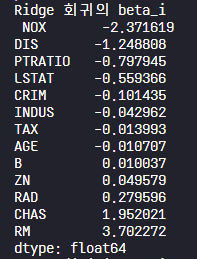

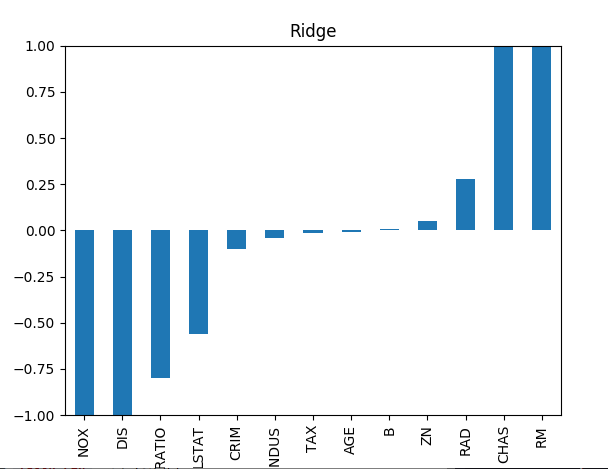

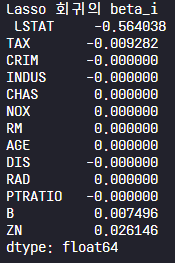

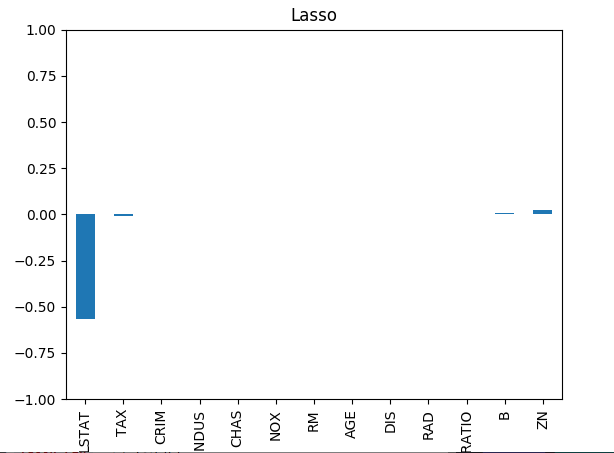